In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import arff


In [8]:
# 'phpvqZpLa.arff' -> 'diabetes.csv'

# Carregar o arquivo ARFF
data, meta = arff.loadarff('data/phpvqZpLa.arff')

# Converter para DataFrame
diabetes = pd.DataFrame(data)

# Converter colunas de bytes para string
for col in diabetes.select_dtypes([object]):  # Seleciona colunas do tipo objeto (possíveis bytes)
    diabetes[col] = diabetes[col].str.decode('utf-8')

# Salvar como CSV
# diabetes.to_csv("data/diabetes.csv", index=False)

In [4]:
try:
    diabetes
except:
    diabetes = pd.read_csv("data/diabetes.csv")

diabetes.shape

(101766, 50)

In [5]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   encounter_id              101766 non-null  float64
 1   patient_nbr               101766 non-null  float64
 2   race                      101766 non-null  object 
 3   gender                    101766 non-null  object 
 4   age                       101766 non-null  object 
 5   weight                    101766 non-null  object 
 6   admission_type_id         101766 non-null  float64
 7   discharge_disposition_id  101766 non-null  float64
 8   admission_source_id       101766 non-null  float64
 9   time_in_hospital          101766 non-null  float64
 10  payer_code                101766 non-null  object 
 11  medical_specialty         101766 non-null  object 
 12  num_lab_procedures        101766 non-null  float64
 13  num_procedures            101766 non-null  f

In [16]:
# Listando quais são os valores únicos de cada coluna para análise
for col in diabetes.columns:
    print(col, "- # val. únicos:", len(diabetes[col].unique()), "\n" , diabetes[col].unique(), "\n")

encounter_id - # val. únicos: 101766 
 [2.27839200e+06 1.49190000e+05 6.44100000e+04 ... 4.43854148e+08
 4.43857166e+08 4.43867222e+08] 

patient_nbr - # val. únicos: 71518 
 [8.22215700e+06 5.56291890e+07 8.60478750e+07 ... 1.40199494e+08
 1.20975314e+08 1.75429310e+08] 

race - # val. únicos: 6 
 ['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic'] 

gender - # val. únicos: 3 
 ['Female' 'Male' 'Unknown/Invalid'] 

age - # val. únicos: 10 
 ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)'] 

weight - # val. únicos: 10 
 ['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200'] 

admission_type_id - # val. únicos: 8 
 [6. 1. 2. 3. 4. 5. 8. 7.] 

discharge_disposition_id - # val. únicos: 26 
 [25.  1.  3.  6.  2.  5. 11.  7. 10.  4. 14. 18.  8. 13. 12. 16. 17. 22.
 23.  9. 20. 15. 24. 28. 19. 27.] 

admission_source_id - # val. únicos: 17 
 [ 1.  7.  2.  4.  5.  6. 20.  3. 17.  8.

In [17]:
print("Valores nulos por coluna:", "\n")
print("atributo", "#")

# Na maioria das colunas, o valor nulo está registrado como '?'
for col in diabetes.columns:
    print(col, diabetes[col][diabetes[col] == "?"].count())

# Na coluna `gender`, o valor nulo está registrado como 'Unknown/Invalid'
print("gender", diabetes["gender"][diabetes["gender"] == "Unknown/Invalid"].count())

Valores nulos por coluna: 

atributo #
encounter_id 0
patient_nbr 0
race 2273
gender 0
age 0
weight 98569
admission_type_id 0
discharge_disposition_id 0
admission_source_id 0
time_in_hospital 0
payer_code 40256
medical_specialty 49949
num_lab_procedures 0
num_procedures 0
num_medications 0
number_outpatient 0
number_emergency 0
number_inpatient 0
diag_1 21
diag_2 358
diag_3 1423
number_diagnoses 0
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide.metformin 0
glipizide.metformin 0
glimepiride.pioglitazone 0
metformin.rosiglitazone 0
metformin.pioglitazone 0
change 0
diabetesMed 0
readmitted 0
gender 3


`A1Cresult`, `max_glu_serum`, `weight`, `payer_code` e `medical_specialty` são colunas com muitos valores nulos.

# Dicionário de Dados do Conjunto
1. **encounter_id**: Identificador único de um encontro do pesquisador com o paciente.
2. **patient_nbr**: Identificador exclusivo de um paciente.
3. **race**: Valores possíveis: Caucasian, Asian, African American, Hispanic e Other.
4. **gender**: Valores possíveis: Male, Female e Unknown/Invalid.
5. **age**: Agrupados em intervalos de 10 anos: (0, 10), (10, 20), ..., (90, 100).
6. **weight**: Peso em libras.
7. **admission_type_id**: Identificador inteiro correspondente a 9 tipos distintos de admissão (ex: emergência, urgência, eletiva, recém-nascido e não disponível).
8. **discharge_disposition_id**: Identificador inteiro correspondente a 29 valores distintos (ex: enviado para casa, expirou, não disponível).
9. **admission_source_id**: Identificador inteiro correspondente a 21 valores distintos (ex: encaminhamento médico, transferência de hospital).
10. **time_in_hospital**: Número inteiro de dias entre a admissão e a alta.
11. **payer_code**: Identificador inteiro correspondente a 23 valores distintos (ex: Blue Cross/Blue Shield, Medicare, auto-pagamento).
12. **medical_specialty**: Identificador inteiro de uma especialidade médica correspondente a 84 valores distintos (ex: cardiologia, medicina interna, clínica geral, cirurgia).
13. **num_lab_procedures**: Número de testes de laboratório realizados durante a consulta.
14. **num_procedures**: Número de procedimentos (exceto testes de laboratório) realizados durante a consulta.
15. **num_medications**: Número de medicamentos genéricos distintos administrados durante a consulta.
16. **number_outpatient**: Número de consultas ambulatoriais do paciente no ano anterior à consulta.
17. **number_emergency**: Número de visitas de emergência do paciente no ano anterior à consulta.
18. **number_inpatient**: Número de visitas hospitalares do paciente no ano anterior à consulta.
19. **diag_1**: Diagnóstico primário (codificado como os três primeiros dígitos da CID-9); 848 valores distintos.
20. **diag_2**: Diagnóstico secundário (codificado como os três primeiros dígitos da CID-9); 923 valores distintos.
21. **diag_3**: Diagnóstico secundário adicional (codificado como os três primeiros dígitos da CID-9); 954 valores distintos.
22. **number_diagnoses**: Número de diagnósticos inseridos no sistema.
23. **max_glu_serum**: Teste sérico de glicose que indica a faixa do resultado ou se o teste não foi realizado. Valores: > 200, > 300, normal e nenhum (se não medido).
24. **A1Cresult**: Teste A1C que indica o intervalo do resultado ou se o teste não foi realizado. Valores: > 8 (se o resultado for maior que 8%), > 7 (maior que 7% e menor que 8%), normal (se o resultado for inferior a 7%) e nenhum (se não medido).

Medicamentos


25. **metformina**
26. **repaglinida**
27. **nateglinida**
28. **clorpropamida**
29. **glimepirida**
30. **acetohexamida**
- **glipizida**
- **gliburida**
- **tolbutamida**
- **pioglitazona**
- **rosiglitazona**
- **acarbose**
- **miglitol**
- **troglitazona**
- **insulina**
- **examide**
- **sitagliptina**
- **saxagliptina**
- **glipizida-metformina**
- **glimepirida-pioglitazona**
- **metformina-rosiglitazona**
- **metformina-pioglitazona**

Cada um desses recursos indica se o medicamento foi prescrito ou se houve uma alteração na dosagem.

Por último:

- **change**: Indica se houve alteração nos medicamentos para diabéticos (dosagem ou nome genérico). Valores: "change" e "no change".
- **diabetesMed**: Indica se houve algum medicamento diabético prescrito. Valores: "sim" e "não".
- **readmitted**: Indica os dias para readmissão hospitalar. Valores: <30 (se o paciente foi readmitido em menos de 30 dias), >30 (se o paciente foi readmitido em mais de 30 dias) e No (para nenhum registro de readmissão).

Target 

- **Readmited** 

readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64


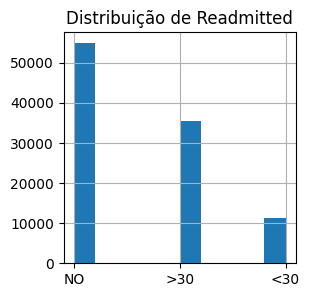

In [18]:
# Explorando o balanceamento do banco de dados

print(diabetes["readmitted"].value_counts())
diabetes["readmitted"].hist(figsize=(3, 3))
plt.title("Distribuição de Readmitted")
plt.show()

In [19]:
# Criando conjuntos de treino e teste estratificados por `readmitted`

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(diabetes, test_size=0.2, random_state=42, stratify=diabetes["readmitted"])

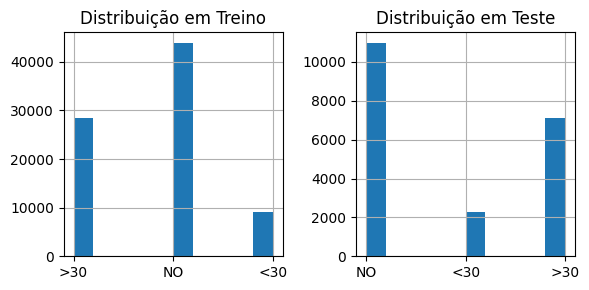

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(6, 3))

train_set["readmitted"].hist(ax = axes[0])
axes[0].set_title("Distribuição em Treino")
test_set["readmitted"].hist(ax = axes[1])
axes[1].set_title("Distribuição em Teste")
plt.tight_layout()
plt.show()

In [21]:
# Salvando os conjuntos de treino e teste, para uso posterior
 
train_set.to_csv("data/diabetes_train_set.csv", index=False)
test_set.to_csv("data/diabetes_test_set.csv", index=False)

# Observações 
`A1Cresult`, `max_glu_serum`, `weight`, `payer_code` e `medical_specialty` são colunas com muitos valores nulos.

`acitoglipton`, `examide`, `citoglipton`, são colunas onde todos os registros possuem o mesmo valor.

Existem outras colunas com valores núlos, mas uma quantidade maenos representativa

## Ações
1. Remover colunas que possuem muitos valores nulos ou só um valor de registro.
2. Remover registros que possuem valores núlos (ou `"?"` e `"Unknown/Invalid"`)